In [ ]:
WORKING WITH BANKING DATASET - EDA, MODEL PREDICTIONS, HYPERPARAMETER TUNING

In [1]:
import pandas as pd
df = pd.read_csv("Downloads/bank-additional-full.csv", sep = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Understanding dataset sturcture

In [2]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

(41188, 21)

In [3]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [16]:
df["poutcome"].value_counts()

poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64

Creating dummy columns for categorical columns, for model's learning

In [2]:
df_new = df.copy()
df_new = pd.get_dummies(df, columns = ['marital', 'housing', 'loan', 'contact', 'poutcome', 'job', 'education'])
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   default                        41188 non-null  object 
 2   month                          41188 non-null  object 
 3   day_of_week                    41188 non-null  object 
 4   duration                       41188 non-null  int64  
 5   campaign                       41188 non-null  int64  
 6   pdays                          41188 non-null  int64  
 7   previous                       41188 non-null  int64  
 8   emp.var.rate                   41188 non-null  float64
 9   cons.price.idx                 41188 non-null  float64
 10  cons.conf.idx                  41188 non-null  float64
 11  euribor3m                      41188 non-null  float64
 12  nr.employed                    41188 non-null 

In [3]:
df_new[df_new.select_dtypes('bool').columns] = df_new.select_dtypes('bool').astype(int)
df_new.head()

,age,default,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,job_unemployed,job_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,no,may,mon,261,1,999,0,1.1,93.994,...,0,0,1,0,0,0,0,0,0,0
1,57,unknown,may,mon,149,1,999,0,1.1,93.994,...,0,0,0,0,0,1,0,0,0,0
2,37,no,may,mon,226,1,999,0,1.1,93.994,...,0,0,0,0,0,1,0,0,0,0
3,40,no,may,mon,151,1,999,0,1.1,93.994,...,0,0,0,1,0,0,0,0,0,0
4,56,no,may,mon,307,1,999,0,1.1,93.994,...,0,0,0,0,0,1,0,0,0,0


Cyclic encoding for less new columns and timeline

In [4]:
import numpy as np

# Month mapping (Jan=1, Feb=2, ..., Dec=12)
month_map = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
df_new['month_num'] = df_new['month'].map(month_map)

# Day of week mapping (mon=1, tue=2, ..., sun=7)
day_map = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5}
df_new['day_num'] = df_new['day_of_week'].map(day_map)


# Month cyclic encoding
df_new['month_sin'] = np.sin(2 * np.pi * df_new['month_num']/12)
df_new['month_cos'] = np.cos(2 * np.pi * df_new['month_num']/12)

# Day cyclic encoding
df_new['day_sin'] = np.sin(2 * np.pi * df_new['day_num']/7)
df_new['day_cos'] = np.cos(2 * np.pi * df_new['day_num']/7)

df_new.drop(['month', 'day_of_week', 'month_num', 'day_num'], axis=1, inplace=True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   default                        41188 non-null  object 
 2   duration                       41188 non-null  int64  
 3   campaign                       41188 non-null  int64  
 4   pdays                          41188 non-null  int64  
 5   previous                       41188 non-null  int64  
 6   emp.var.rate                   41188 non-null  float64
 7   cons.price.idx                 41188 non-null  float64
 8   cons.conf.idx                  41188 non-null  float64
 9   euribor3m                      41188 non-null  float64
 10  nr.employed                    41188 non-null  float64
 11  y                              41188 non-null  object 
 12  marital_divorced               41188 non-null 

Using different maps for better visualization

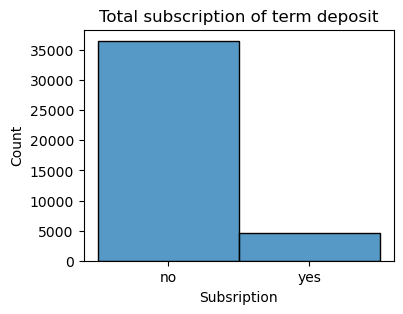

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (4,3))
sns.histplot( x = "y", data = df_new)
plt.xlabel("Subsription")
plt.title("Total subscription of term deposit")
plt.show()

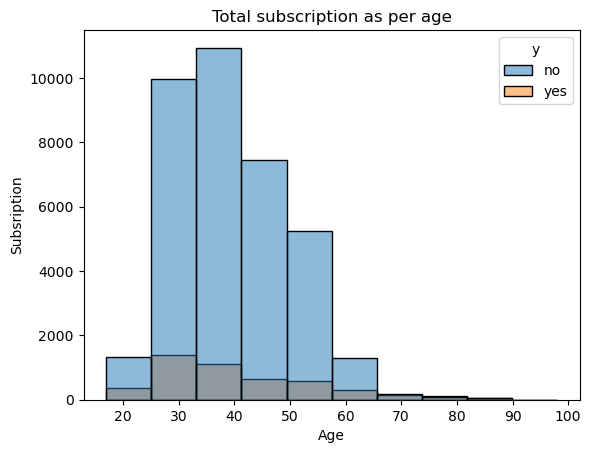

In [21]:
sns.histplot( x = "age", data = df_new, hue = "y", bins = 10)
plt.xlabel("Age")
plt.ylabel("Subsription")
plt.title("Total subscription as per age")
plt.show()

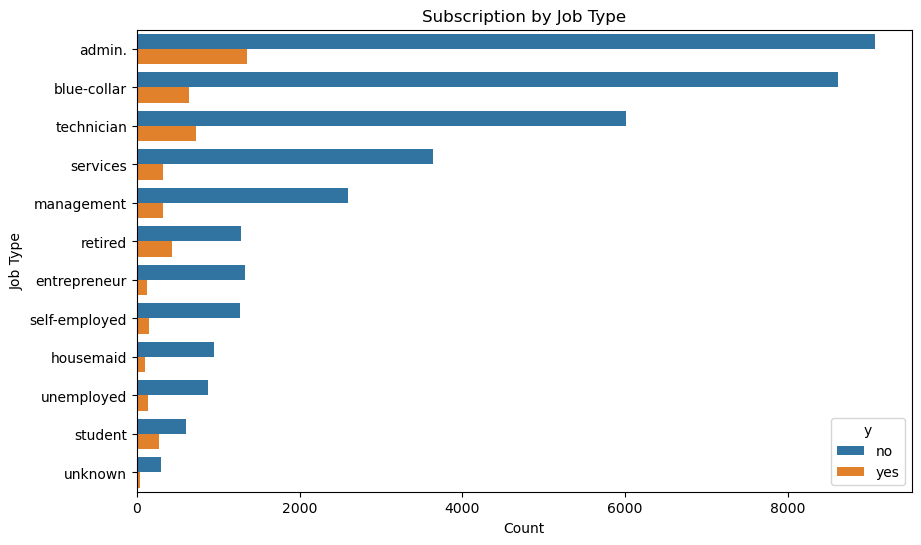

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(y="job", data=df, hue="y", order=df["job"].value_counts().index)
plt.title("Subscription by Job Type")
plt.xlabel("Count")
plt.ylabel("Job Type")
plt.show()


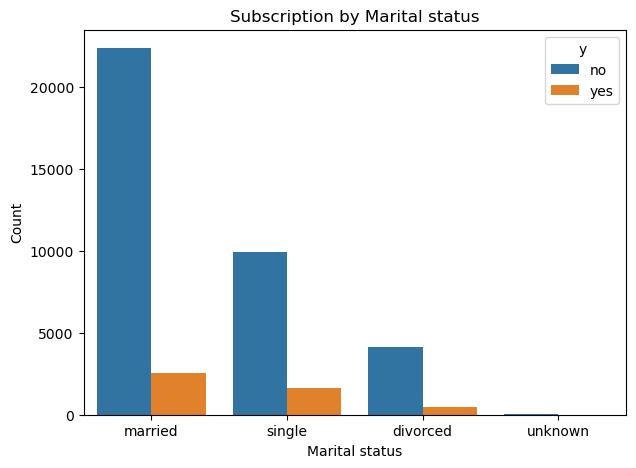

In [20]:
plt.figure(figsize=(7,5))
sns.countplot(hue="y", data=df, x="marital")
plt.title("Subscription by Marital status")
plt.xlabel("Marital status")
plt.ylabel("Count")
plt.show()

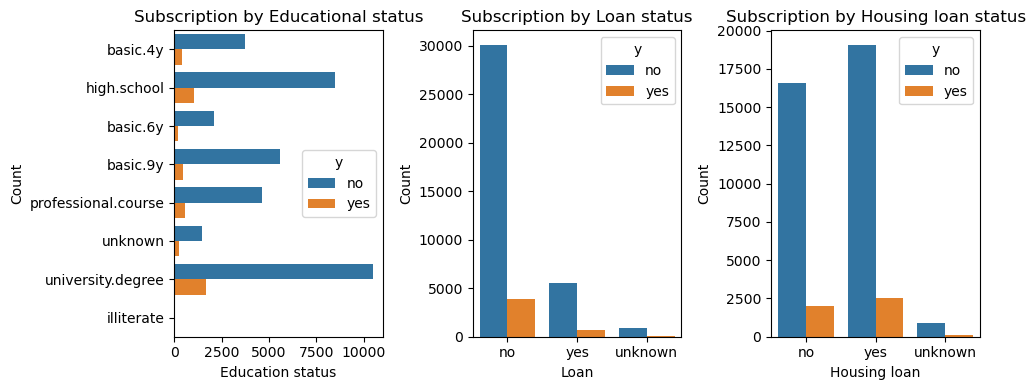

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(10,4))
sns.countplot(hue="y", data=df, y="education", ax = axes[0])
axes[0].set_title("Subscription by Educational status")
axes[0].set_xlabel("Education status")
axes[0].set_ylabel("Count")

sns.countplot(hue="y", data=df, x="loan", ax = axes[1])
axes[1].set_title("Subscription by Loan status")
axes[1].set_xlabel("Loan")
axes[1].set_ylabel("Count")

sns.countplot(hue="y", data=df, x="housing", ax = axes[2])
axes[2].set_title("Subscription by Housing loan status")
axes[2].set_xlabel("Housing loan")
axes[2].set_ylabel("Count")

plt.tight_layout()
plt.show()

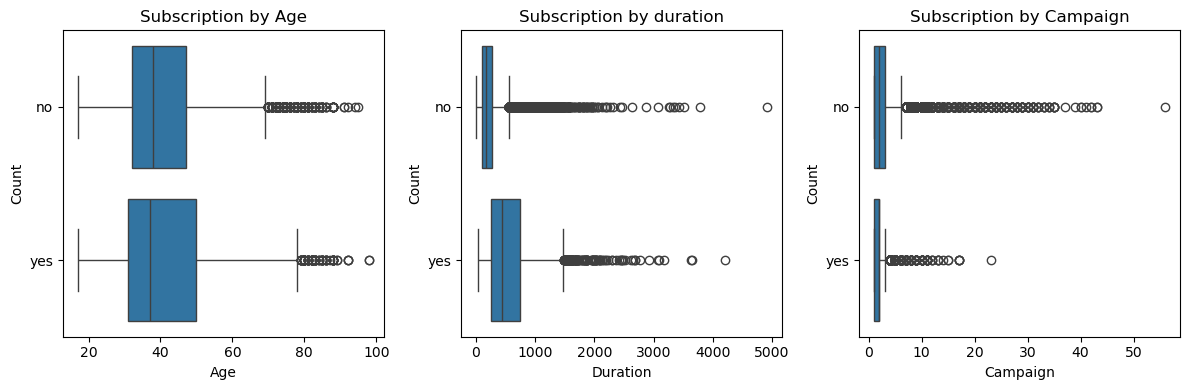

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))
sns.boxplot(y="y", data=df, x="age", ax = axes[0])
axes[0].set_title("Subscription by Age")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Count")

sns.boxplot(y="y", data=df, x="duration", ax = axes[1])
axes[1].set_title("Subscription by duration")
axes[1].set_xlabel("Duration")
axes[1].set_ylabel("Count")

sns.boxplot(y="y", data=df, x="campaign", ax = axes[2])
axes[2].set_title("Subscription by Campaign")
axes[2].set_xlabel("Campaign")
axes[2].set_ylabel("Count")

plt.tight_layout()
plt.show()

In [6]:
numeric_df = df.select_dtypes(include = ["int64", "float64"])
correlation = numeric_df.corr()

Finding relation between the columns

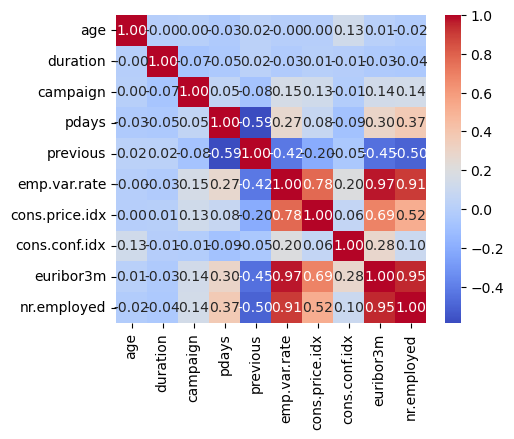

In [7]:
plt.figure(figsize = (5,4))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [57]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   default                        41188 non-null  object 
 2   duration                       41188 non-null  int64  
 3   campaign                       41188 non-null  int64  
 4   pdays                          41188 non-null  int64  
 5   previous                       41188 non-null  int64  
 6   emp.var.rate                   41188 non-null  float64
 7   cons.price.idx                 41188 non-null  float64
 8   cons.conf.idx                  41188 non-null  float64
 9   euribor3m                      41188 non-null  float64
 10  nr.employed                    41188 non-null  float64
 11  y                              41188 non-null  object 
 12  marital_divorced               41188 non-null 

In [8]:
df_new = df_new.drop("default", axis = 1)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  y                              41188 non-null  object 
 11  marital_divorced               41188 non-null  int32  
 12  marital_married                41188 non-null 

Training and testing models using train test split

In [9]:
from sklearn.model_selection import train_test_split
X = df_new.drop("y", axis = 1)
y = df_new["y"].map({"yes" : 1, "no" : 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

print("Train set: ", X_train.shape, y_train.shape)
print("Test set: ", X_test.shape, y_test.shape)

Train set:  (32950, 49) (32950,)
Test set:  (8238, 49) (8238,)


Using logistic regression model

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter = 1000, random_state = 42)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_acc = accuracy_score( y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print("Train accuracy score: ", train_acc)
print("Test accuracy score: ", test_acc)

Train accuracy score:  0.9103793626707132
Test accuracy score:  0.9129643117261471


C:\Users\sukhw\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier( random_state = 42)
tree.fit(X_train, y_train)

y_train_pred2 = tree.predict(X_train)
y_test_pred2 = tree.predict(X_test)

print("Train accuracy: ", accuracy_score(y_train, y_train_pred2))
print("Test accuracy: ", accuracy_score(y_test, y_test_pred2))

Train accuracy:  1.0
Test accuracy:  0.8907501820830298


In [11]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier( random_state = 42, max_depth = 3, n_estimators = 200)
forest.fit(X_train, y_train)

y_train_pred3 = forest.predict(X_train)
y_test_pred3 = forest.predict(X_test)

print("Train accuracy: ", accuracy_score(y_train, y_train_pred3))
print("Test accuracy: ", accuracy_score(y_test, y_test_pred3))

Train accuracy:  0.9008497723823976
Test accuracy:  0.9011896091284293


Results of all the models, random forest classifier is far now the best

In [17]:
results = {
    "Model" : ["Logistic Regression", "DecisionTreeClassifier", "RandomForestClassifier(tuned)"],
    "Train accuracy" : [ 0.9103793626707132, 1.0, 0.9008497723823976],
    "Test accuracy" : [ 0.9129643117261471, 0.8907501820830298, 0.9011896091284293],
    "Gap": [0.003, 0.109, 0.0003]
}

df_results = pd.DataFrame(results)
print(df_results)

                           Model  Train accuracy  Test accuracy     Gap
0            Logistic Regression        0.910379       0.912964  0.0030
1         DecisionTreeClassifier        1.000000       0.890750  0.1090
2  RandomForestClassifier(tuned)        0.900850       0.901190  0.0003


In [17]:
!pip install imbalanced-learn


Decision Tree clearly overfitted
Logistic Regression worked quite well, but slightly less accurate
Random Forest has best results after tuning , with least gap, most balanced results and strong accuracy

Using a boosting model, along with hyperparameters tuning and also oversampling

In [12]:
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before smote: ", X_train.shape, y_train.value_counts())
print("After smote: ", X_train_res.shape, y_train_res.value_counts())

xgb_model = XGBClassifier(max_depth = 3, learning_rate = 0.1, n_estimators = 200, random_state = 42)
xgb_model.fit(X_train_res, y_train_res)

y_train_pred4 = xgb_model.predict(X_train)
y_test_pred4 = xgb_model.predict(X_test)

score_train = xgb_model.score(X_train_res, y_train_res)
score_test = xgb_model.score(X_test, y_test)

print("Train accuracy: ", score_train)
print("Test accuracy: ", score_test)

Before smote:  (32950, 49) y
0    29238
1     3712
Name: count, dtype: int64
After smote:  (58476, 49) y
0    29238
1    29238
Name: count, dtype: int64
Train accuracy:  0.95257883576168
Test accuracy:  0.9169701383831027


Confusion matrix + classifications report

In [13]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_test_pred4)
print("Confusion Matrix: ", cm)
print("\nClassification Report: ", classification_report(y_test, y_test_pred4))

Confusion Matrix:  [[7011  299]
 [ 385  543]]

Classification Report:                precision    recall  f1-score   support

           0       0.95      0.96      0.95      7310
           1       0.64      0.59      0.61       928

    accuracy                           0.92      8238
   macro avg       0.80      0.77      0.78      8238
weighted avg       0.91      0.92      0.92      8238



In [14]:
model2 = LogisticRegression(max_iter = 1000, random_state = 42)
model2.fit(X_train_res, y_train_res)

y_train_pred_2 = model2.predict(X_train_res)
y_test_pred_2 = model2.predict(X_test)

train_acc = accuracy_score( y_train_res, y_train_pred_2)
test_acc = accuracy_score(y_test, y_test_pred_2)
print("Train accuracy score: ", train_acc)
print("Test accuracy score: ", test_acc)

Train accuracy score:  0.9381455639920652
Test accuracy score:  0.9053168244719592


C:\Users\sukhw\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
cm_2 = confusion_matrix( y_test, y_test_pred_2 )
print("Confusion matrix: ", cm_2)
print("Classification report: ", classification_report(y_test, y_test_pred_2))

Confusion matrix:  [[7006  304]
 [ 476  452]]
Classification report:                precision    recall  f1-score   support

           0       0.94      0.96      0.95      7310
           1       0.60      0.49      0.54       928

    accuracy                           0.91      8238
   macro avg       0.77      0.72      0.74      8238
weighted avg       0.90      0.91      0.90      8238



Checking for difference in gaps after using SMOTE, to remove imbalance in 'y'

In [16]:
forest2 = RandomForestClassifier( random_state = 42, max_depth = 3, n_estimators = 200, class_weight="balanced")
forest2.fit(X_train, y_train)

y_train_pred_3 = forest2.predict(X_train_res)
y_test_pred_3 = forest2.predict(X_test)

y_probs = forest2.predict_proba(X_test)[:, 1]

threshold = 0.3   

# new predictions with custom threshold
y_pred_thresh = (y_probs >= threshold).astype(int)

# results
print("Accuracy:", accuracy_score(y_test, y_pred_thresh))

print("Train accuracy: ", accuracy_score(y_train_res, y_train_pred_3))
print("Test accuracy: ", accuracy_score(y_test, y_test_pred_3))

cm_3 = confusion_matrix( y_test, y_pred_thresh )
print("Confusion matrix: ", cm_3)
print("Classification report: ", classification_report(y_test, y_pred_thresh))

Accuracy: 0.5890992959456178
Train accuracy:  0.7670497298036801
Test accuracy:  0.8377033260500122
Confusion matrix:  [[3932 3378]
 [   7  921]]
Classification report:                precision    recall  f1-score   support

           0       1.00      0.54      0.70      7310
           1       0.21      0.99      0.35       928

    accuracy                           0.59      8238
   macro avg       0.61      0.77      0.53      8238
weighted avg       0.91      0.59      0.66      8238



If the bank wants to catch as many yes as possible (don’t miss customers) → choose low threshold (recall ↑, precision ↓).

If the bank wants more surety when saying yes (fewer false alarms) → choose higher threshold (precision ↑, recall ↓).

Checking all the parameters for better decision making

In [26]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score
)

forest2 = RandomForestClassifier( random_state = 42, max_depth = 3, n_estimators = 200, class_weight="balanced")
forest2.fit(X_train, y_train)

y_train_pred_3 = forest2.predict(X_train_res)
y_test_pred_3 = forest2.predict(X_test)

y_probs = forest2.predict_proba(X_test)[:, 1]

#thresholds = np.arange(0.1, 0.91, 0.05)
#rows = []
#for thr in thresholds:
#    y_pred_thr = (y_probs >= thr).astype(int)
#    prec = precision_score(y_test, y_pred_thr, zero_division=0)
#    rec = recall_score(y_test, y_pred_thr)
#    f1 = f1_score(y_test, y_pred_thr)
#    rows.append((thr, prec, rec, f1))

#df_thr = pd.DataFrame(rows, columns=['threshold','precision','recall','F1 score'])
#df_thr
#df_thr.head(10)

t = 0.7   # ya 0.6
y_pred_t = (y_probs >= t).astype(int)

precision = precision_score(y_test, y_pred_t)
recall = recall_score(y_test, y_pred_t)
f1 = f1_score(y_test, y_pred_t)

print("Precision score: ", precision)
print("Recall score: ", recall)
print("F1 score: ", f1)

# results
#print("Accuracy:", accuracy_score(y_test, y_pred_thr))

#print("Train accuracy: ", accuracy_score(y_train_res, y_train_pred_3))
#print("Test accuracy: ", accuracy_score(y_test, y_test_pred_3))

#cm_3 = confusion_matrix( y_test, y_pred_thr )
#print("Confusion matrix: ", cm_3)
#print("Classification report: ", classification_report(y_test, y_pred_thr))

Precision score:  0.606508875739645
Recall score:  0.4418103448275862
F1 score:  0.5112219451371571


0.3 → recall max (99%), precision useless.

0.5 → recall 71%, precision thoda better but still weak.

0.6 → precision 50%, recall 55%, F1 balance.

Use threshold of 0.5 or less, if more than precision, recall(people who said yes) matters. And threshold of more if 
precision(model predicts and people verdict matches) is more important

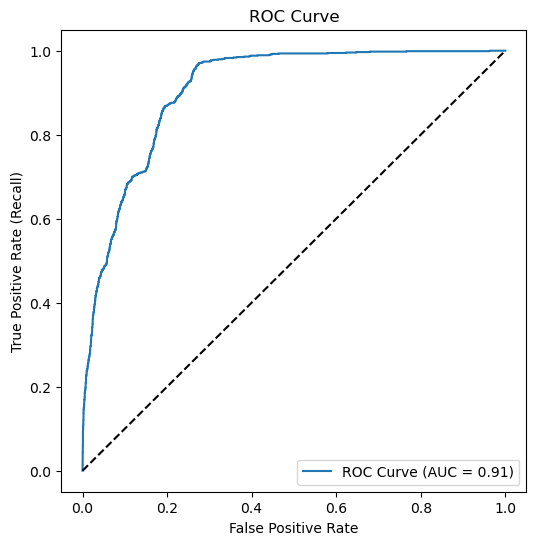

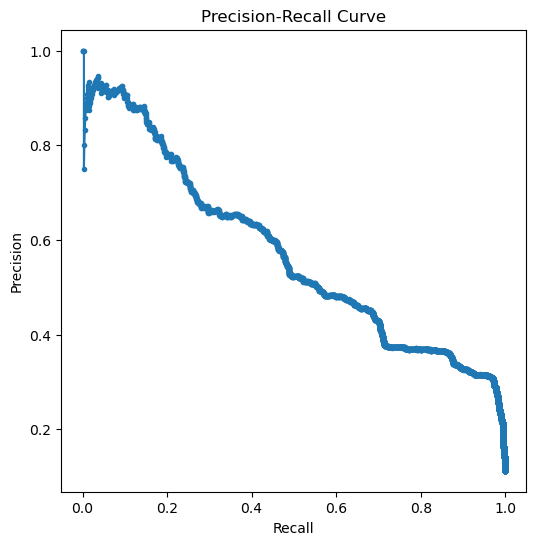

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # random line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.show()

precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)
plt.figure(figsize=(6, 6))
plt.plot(recalls, precisions, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()